In [1]:
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline


In [2]:
def target(x):
    return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/ (x**2 + 1)


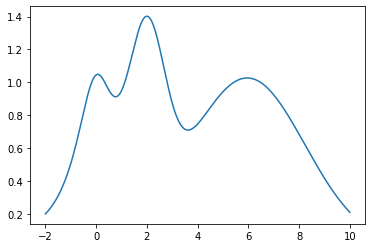

In [3]:
x = np.linspace(-2, 10, 10000).reshape(-1, 1)
y = target(x)

plt.plot(x, y);

In [4]:
def posterior(optimizer, x_obs, y_obs, grid):
    optimizer._gp.fit(x_obs, y_obs)

    mu, sigma = optimizer._gp.predict(grid, return_std=True)
    return mu, sigma

def plot_gp(optimizer, x, y):
    fig = plt.figure(figsize=(16, 10))
    steps = len(optimizer.space)
    fig.suptitle(
        'Gaussian Process and Utility Function After {} Steps'.format(steps),
        fontdict={'size':30}
    )
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    x_obs = np.array([[res["params"]["x"]] for res in optimizer.res])
    y_obs = np.array([res["target"] for res in optimizer.res])
    
    mu, sigma = posterior(optimizer, x_obs, y_obs, x)
    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(x_obs.flatten(), y_obs, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    
    axis.set_xlim((-2, 10))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility_function = UtilityFunction(kind="ucb", kappa=5, xi=0)
    utility = utility_function.utility(x, optimizer._gp, 0)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 10))
    acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)

In [7]:
optimizer = BayesianOptimization(target, {'x': (-2, 10)}, random_state=27)


In [8]:
optimizer.maximize(init_points=2, n_iter=0, kappa=5)


|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8198   |  3.109    |
|  2        |  0.746    |  7.775    |


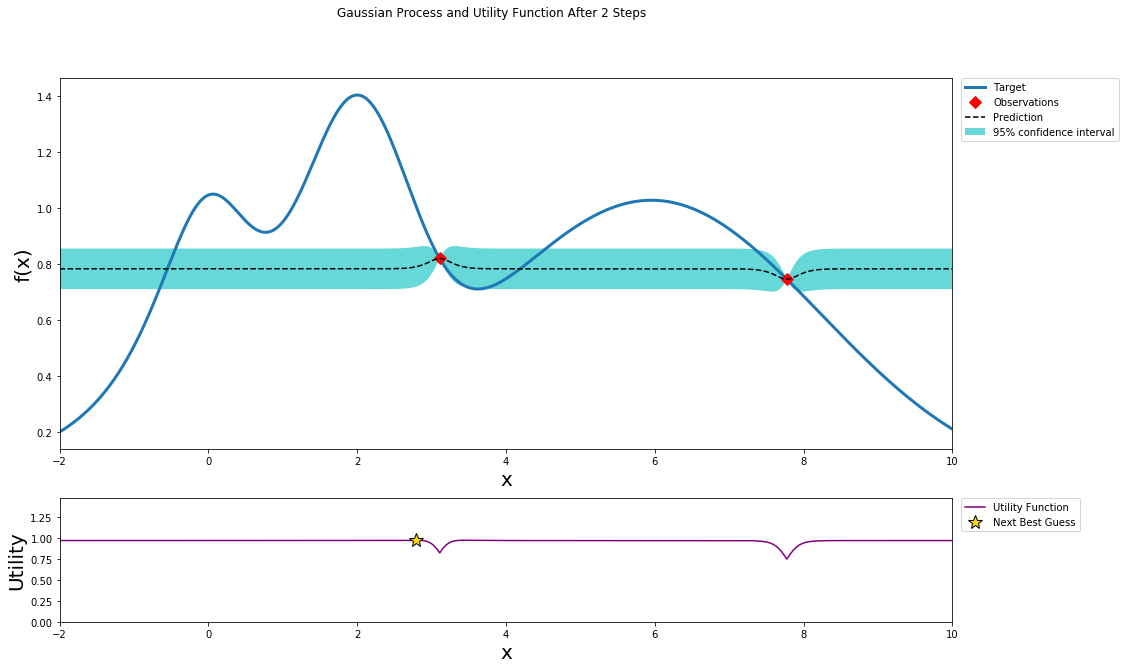

In [9]:
plot_gp(optimizer, x, y)


|   iter    |  target   |     x     |
-------------------------------------
|  3        |  0.5234   | -0.9694   |


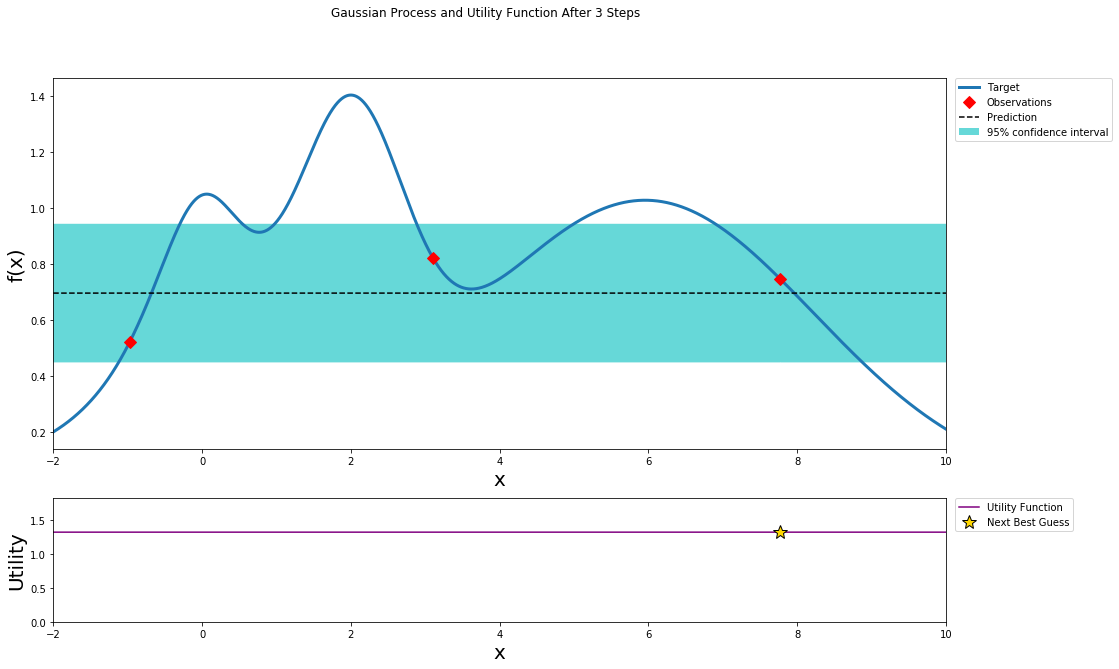

In [10]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)


|   iter    |  target   |     x     |
-------------------------------------
|  4        |  0.8164   |  3.116    |


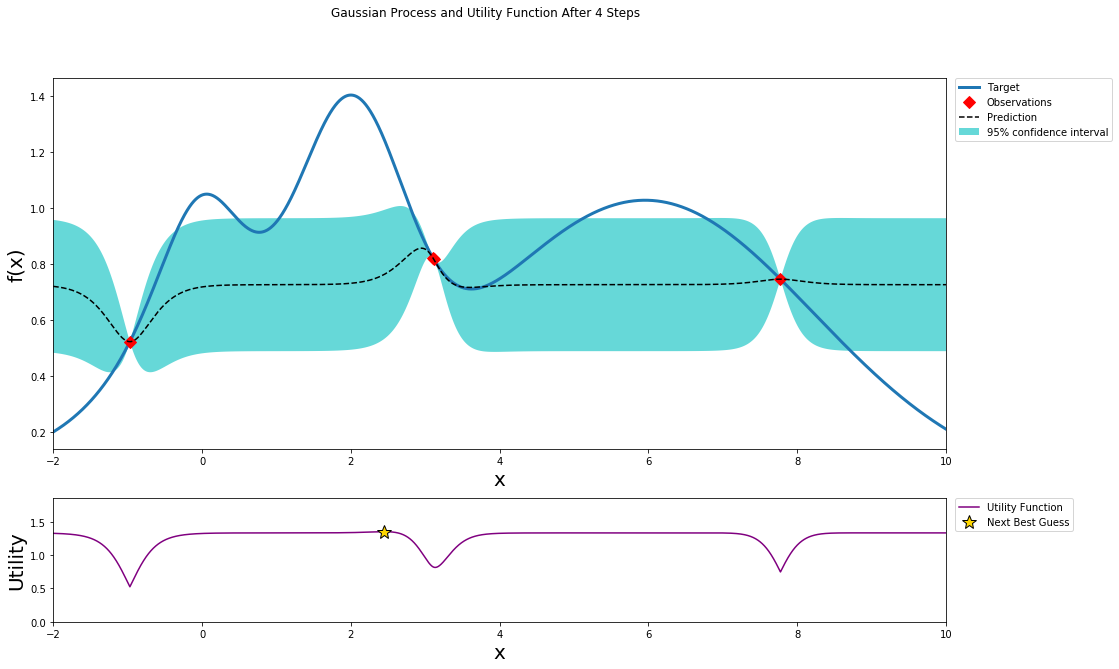

In [11]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)


|   iter    |  target   |     x     |
-------------------------------------
|  5        |  1.243    |  2.449    |


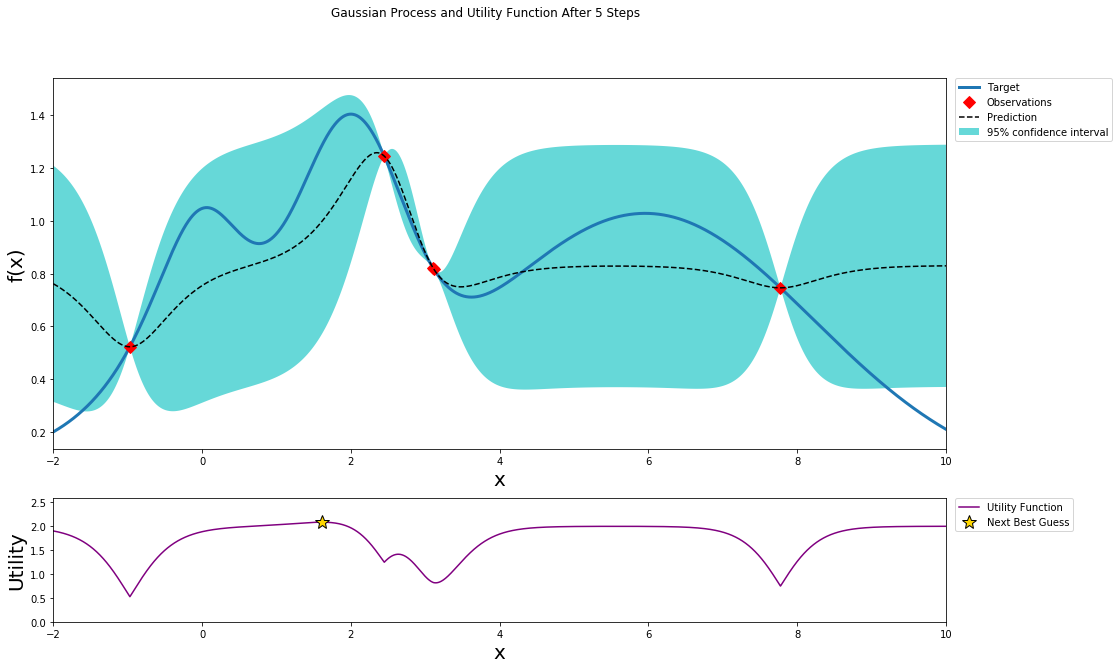

In [12]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)


|   iter    |  target   |     x     |
-------------------------------------
|  6        |  1.283    |  1.61     |


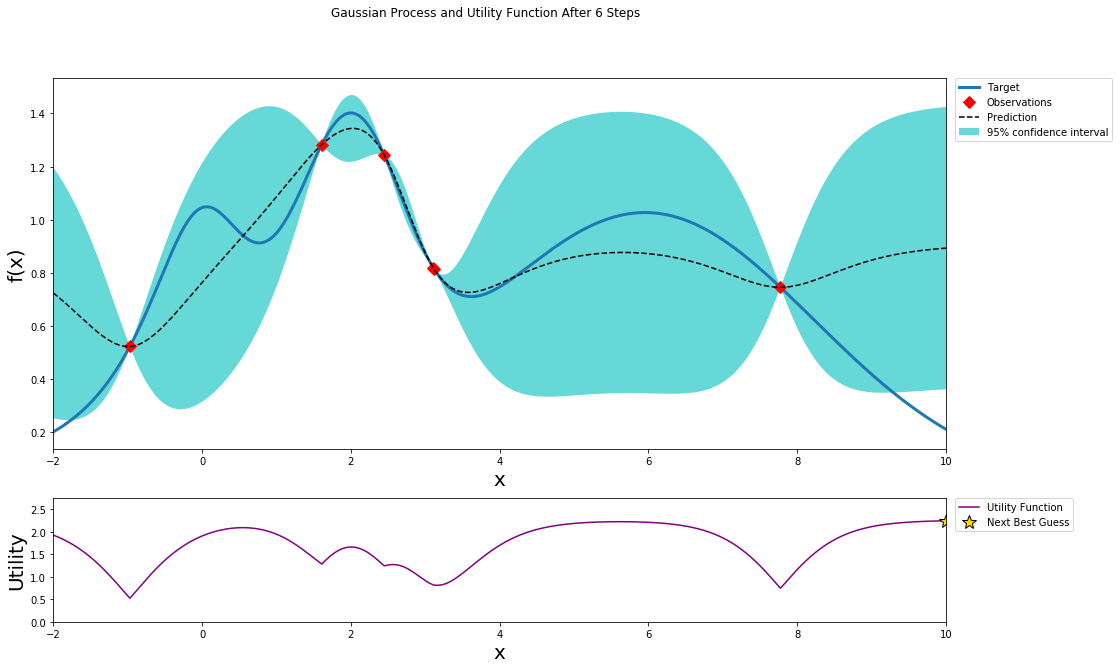

In [13]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)


|   iter    |  target   |     x     |
-------------------------------------
|  7        |  0.2118   |  10.0     |


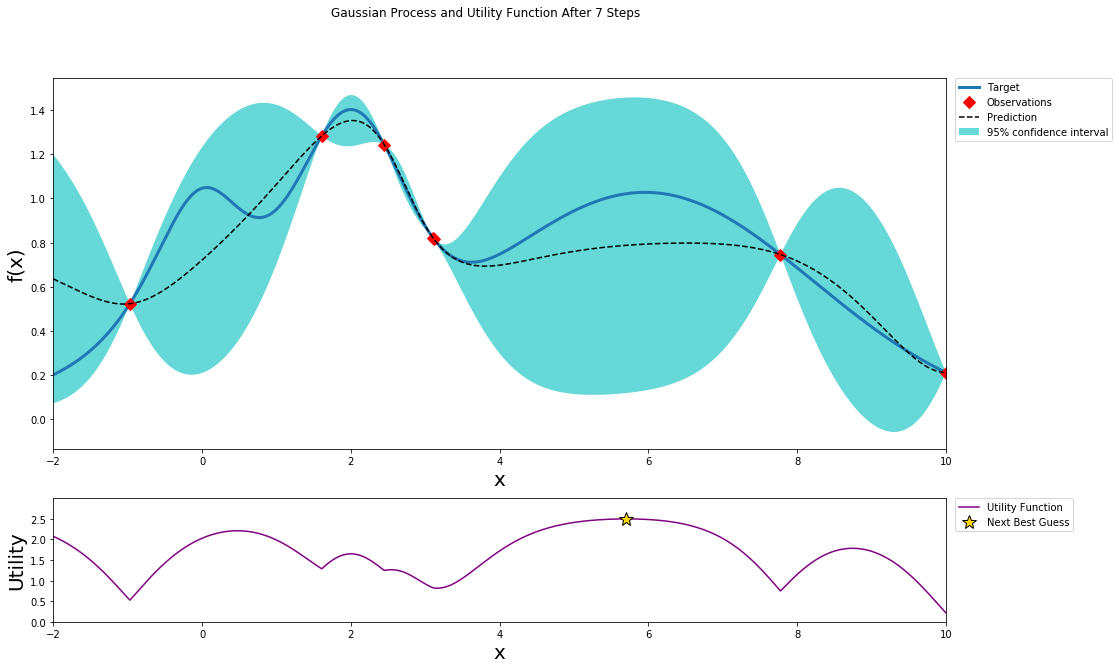

In [14]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)


|   iter    |  target   |     x     |
-------------------------------------
|  8        |  1.021    |  5.704    |


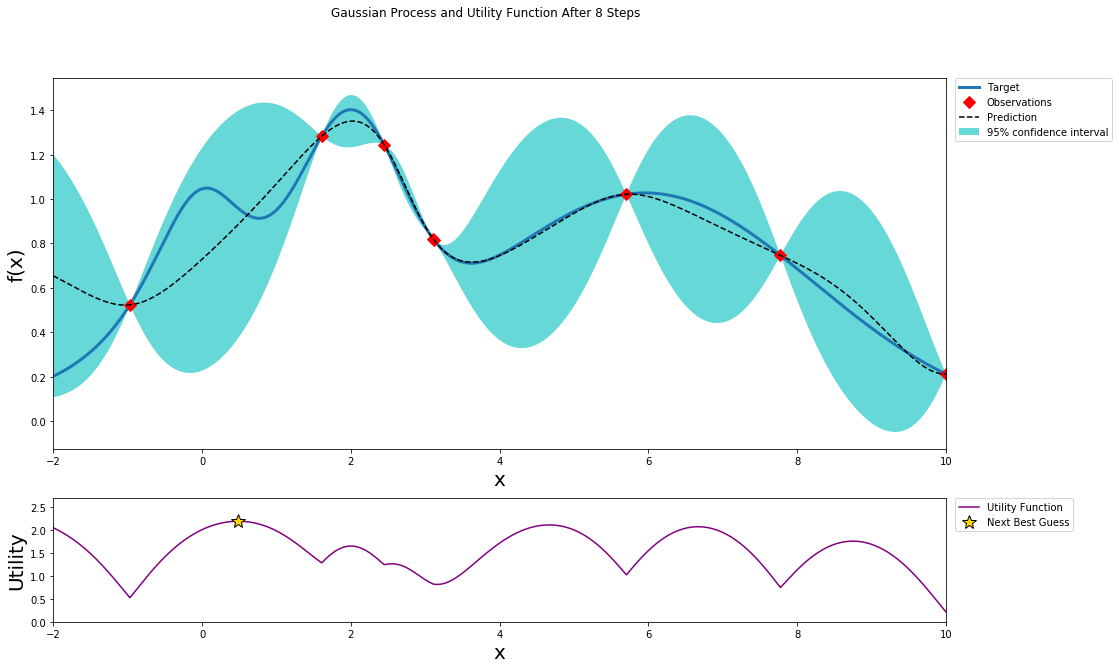

In [15]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)


|   iter    |  target   |     x     |
-------------------------------------
|  9        |  0.9572   |  0.488    |


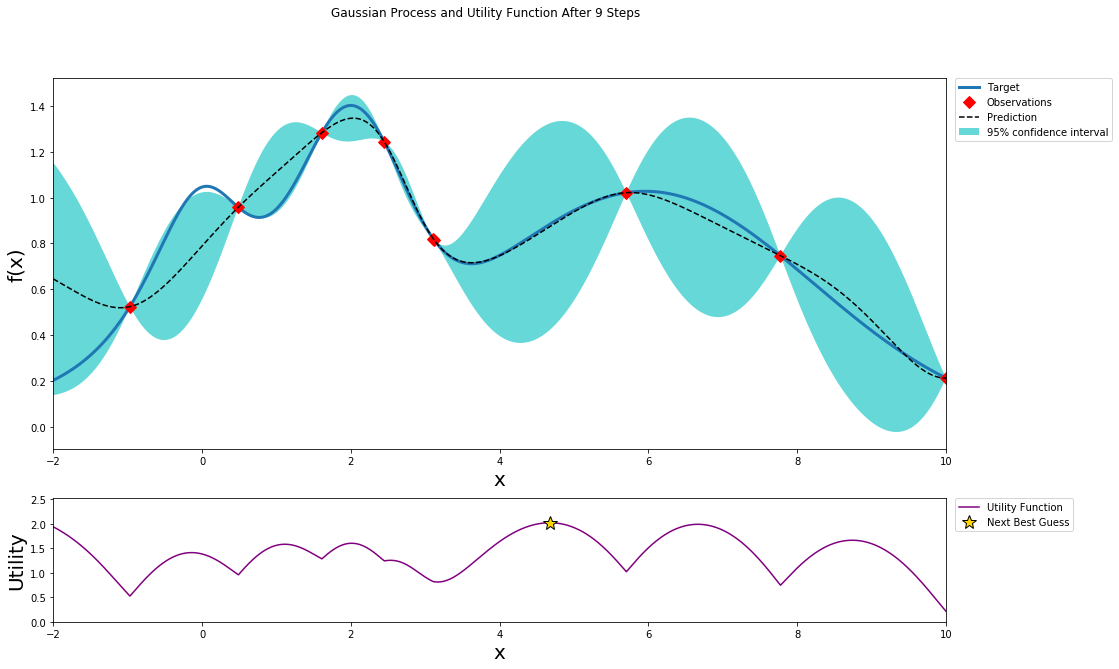

In [16]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)


|   iter    |  target   |     x     |
-------------------------------------
|  10       |  0.8836   |  4.675    |


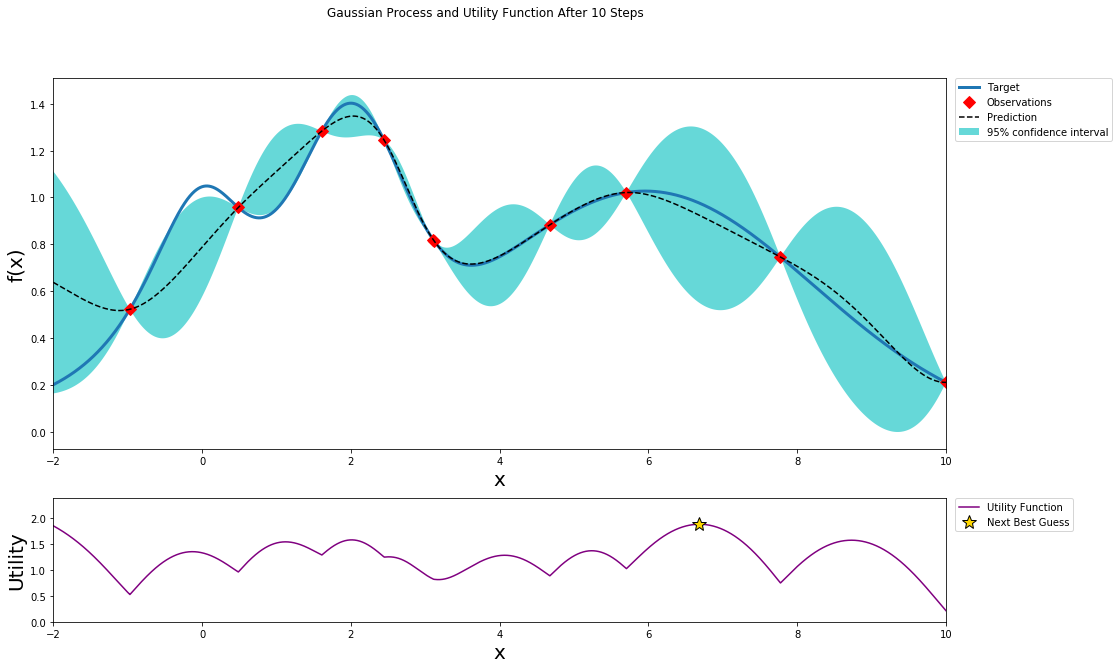

In [17]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)


|   iter    |  target   |     x     |
-------------------------------------
|  11       |  0.9759   |  6.686    |


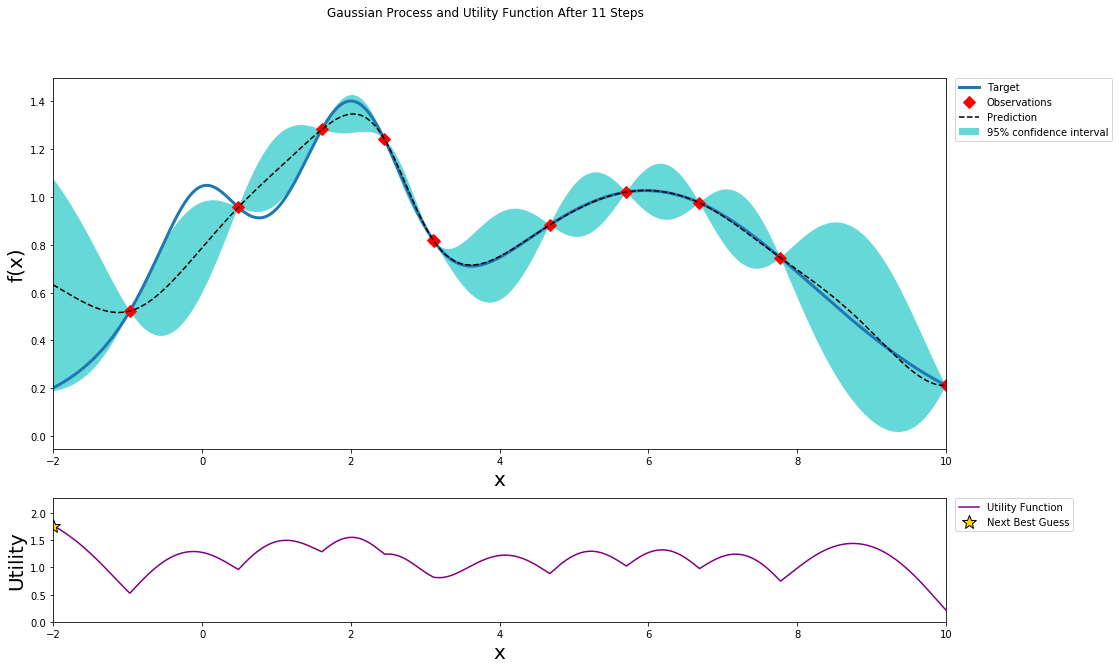

In [18]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)


|   iter    |  target   |     x     |
-------------------------------------
|  12       |  0.2017   | -2.0      |


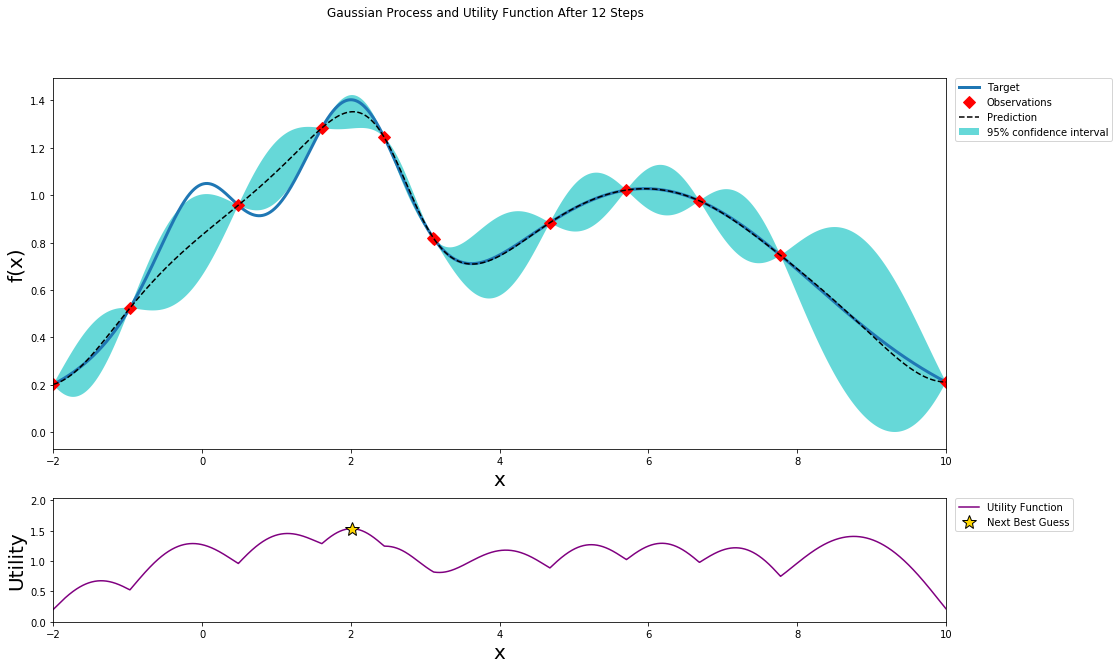

In [19]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)


|   iter    |  target   |     x     |
-------------------------------------
|  13       |  1.402    |  2.01     |


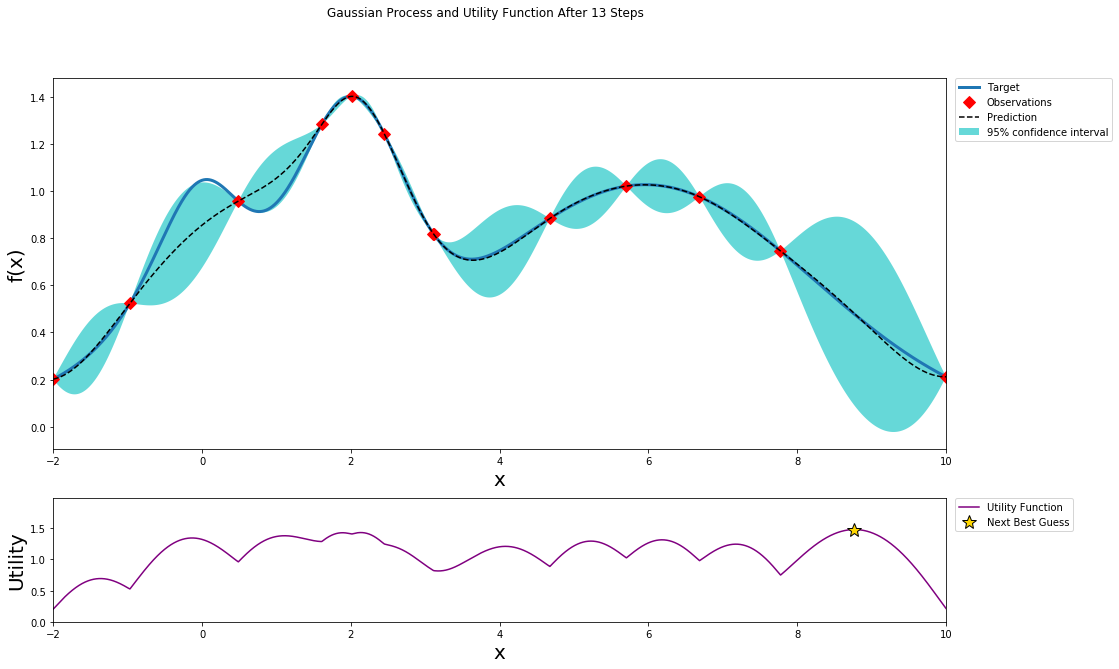

In [20]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)


|   iter    |  target   |     x     |
-------------------------------------
|  14       |  0.477    |  8.77     |


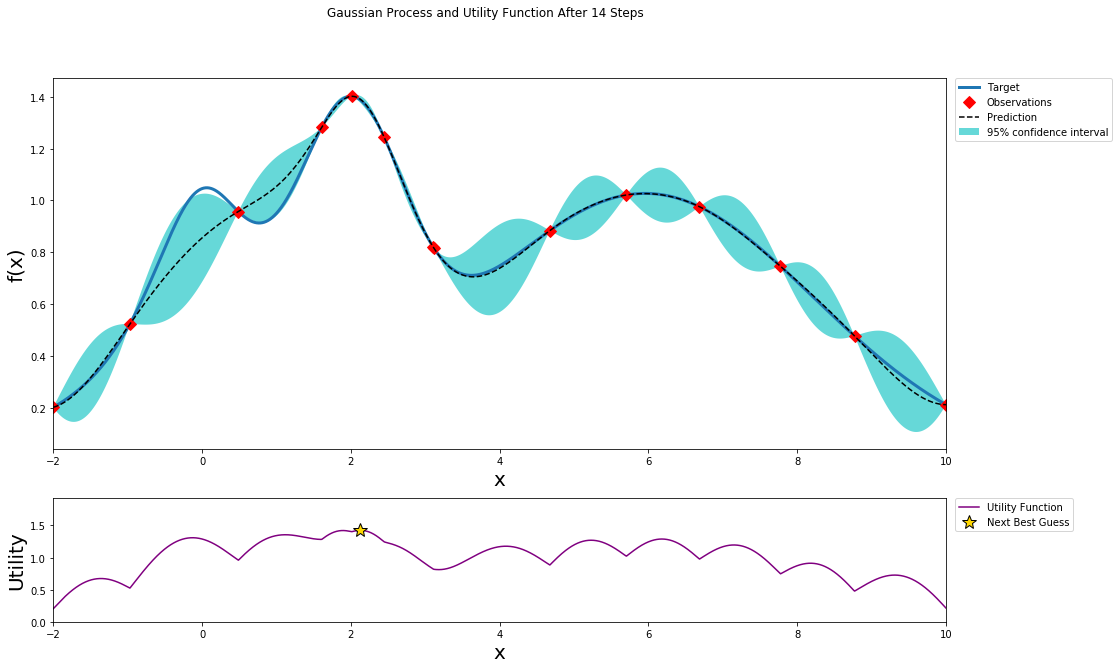

In [21]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)


|   iter    |  target   |     x     |
-------------------------------------
|  15       |  1.387    |  2.131    |


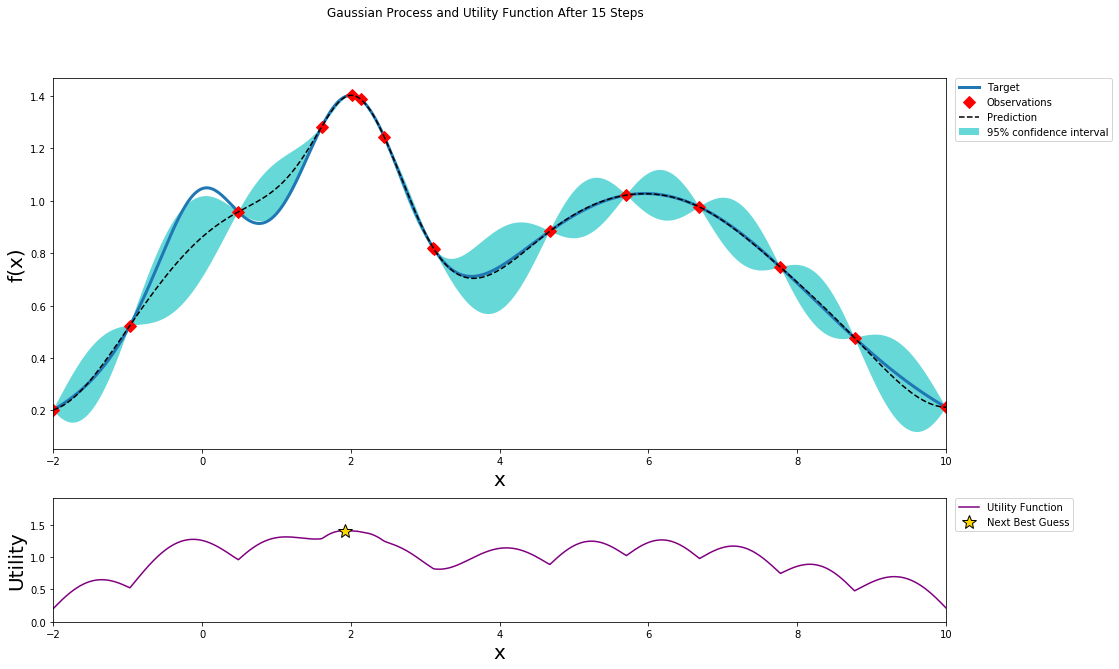

In [22]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)


|   iter    |  target   |     x     |
-------------------------------------
|  16       |  1.396    |  1.919    |


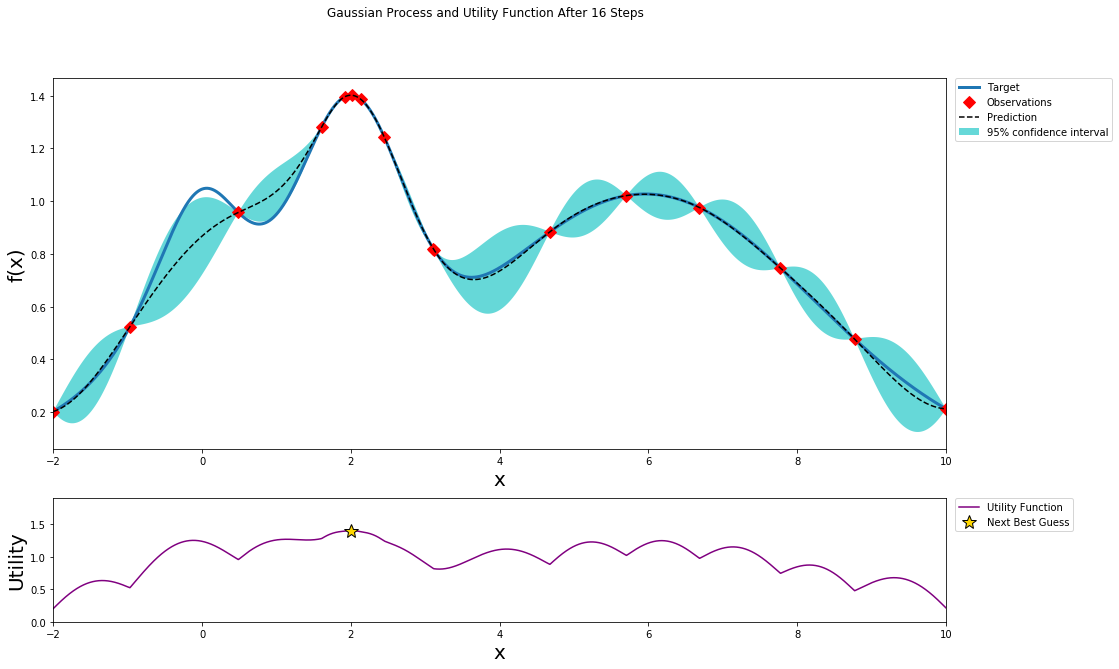

In [23]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)


|   iter    |  target   |     x     |
-------------------------------------
|  17       |  1.402    |  1.999    |


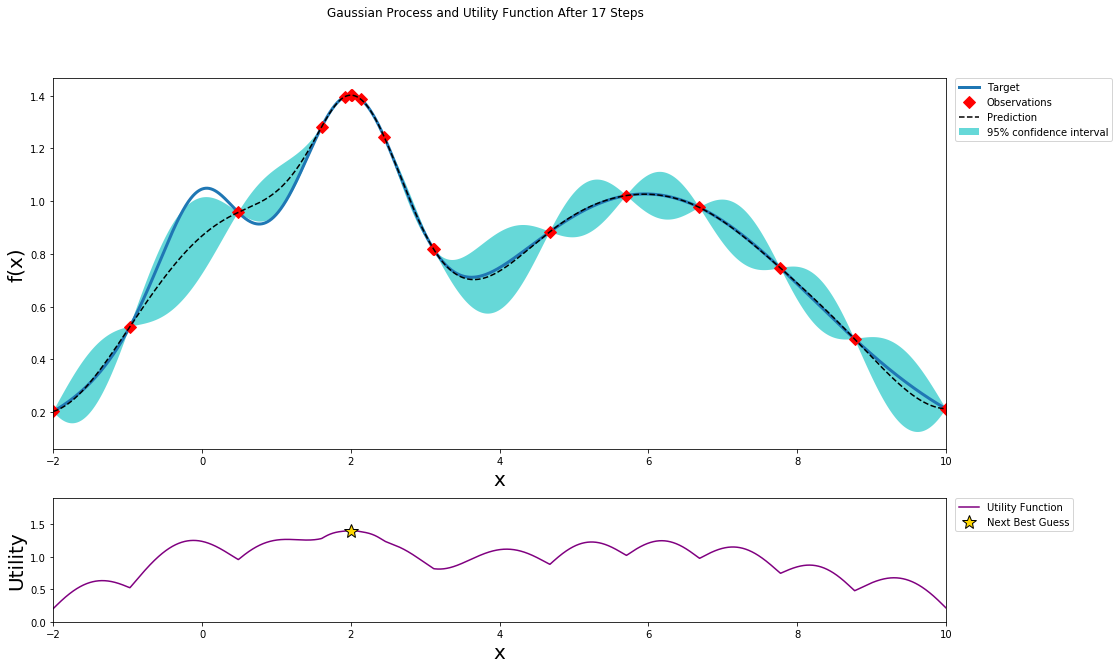

In [24]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)


|   iter    |  target   |     x     |
-------------------------------------
|  18       |  1.402    |  1.999    |


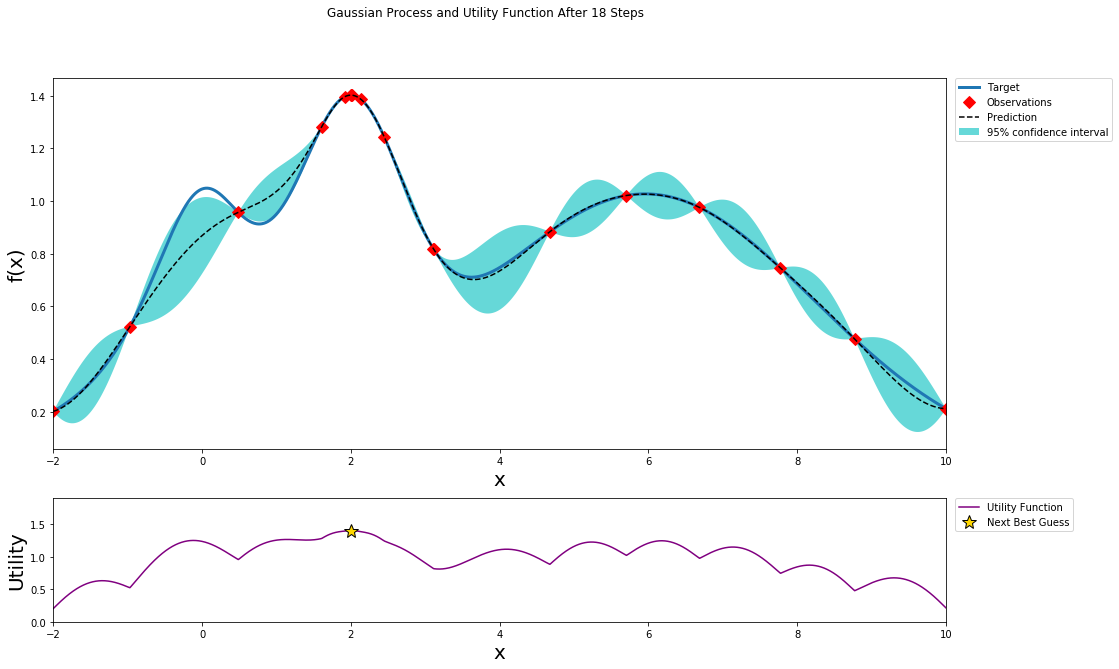

In [25]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)
